## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

C:\Users\Yan Peng\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# Define path
path = r'C:\Users\Yan Peng\LA Crimes'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'crime_data_checked.csv'),  index_col = 0)

In [5]:
df.columns

Index(['case_number', 'date_reported', 'date_occurred', 'time_occurred',
       'area', 'area_name', 'reporting_distict', 'part_1_2_crimes',
       'crime_code', 'crime_code_description', 'Mocodes', 'victim_age',
       'victim_sex', 'victim_descent', 'premise_code', 'premise_description',
       'weapon_used_code', 'weapon_description', 'Status', 'Status Desc',
       'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'location',
       'Cross Street', 'LAT', 'LON'],
      dtype='object')

## 2. Create a correlation matrix heatmap

### Aggregate data by year and month to create continuous columns

In [6]:
# Convert 'date_occurred' to datetime format
df['date_occurred'] = pd.to_datetime(df['date_occurred'])

C:\Users\Yan Peng\AppData\Local\Temp\ipykernel_22672\1616305408.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_occurred'] = pd.to_datetime(df['date_occurred'])


In [7]:
# Create week, month, and year columns
df['year_month'] = df['date_occurred'].dt.strftime('%Y-%m')

### Crosstab categorical columns (year, month, area_name) with continuous ones (top 5 crimes counts)

In [8]:
# Find out the top 5 crimes
crime_counts = df['crime_code_description'].value_counts().nlargest(5)

In [9]:
crime_counts

crime_code_description
VEHICLE - STOLEN            94923
BATTERY - SIMPLE ASSAULT    70311
THEFT OF IDENTITY           54937
BURGLARY FROM VEHICLE       54536
BURGLARY                    54076
Name: count, dtype: int64

In [10]:
# Save the top 5 crimes into a list
top_5_crimes = crime_counts.index.tolist()

In [11]:
# Create a crosstab grouping by year, month, and area_name
crosstab = pd.crosstab(index=[df['year_month'], df['area_name']], columns=df['crime_code_description'], dropna = False)

In [12]:
# Convert crosstab into a dataframe
df2 = pd.DataFrame(crosstab[top_5_crimes])

In [20]:
df2.shape

(1029, 5)

In [25]:
pd.options.display.max_rows = 50

In [ ]:
df2.head(50)

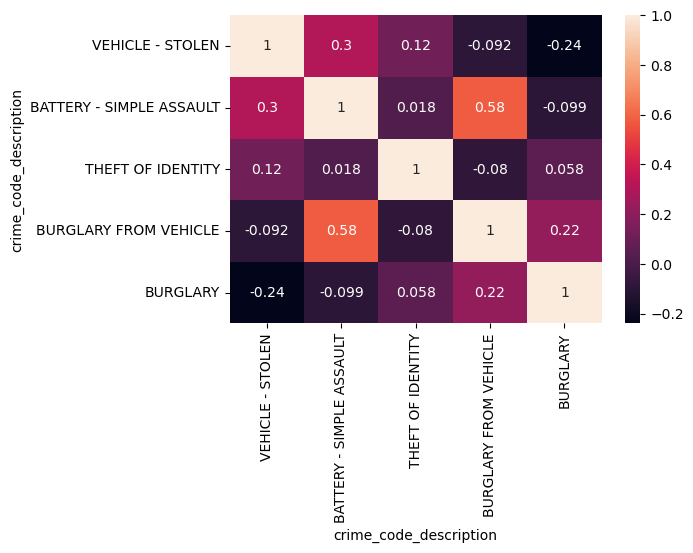

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(6,4))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(df2.corr(), annot = True, ax = ax)

#### The strongest correlation exists between Simple Assault and Burglary from Vehicle (0.58), meaning the occurrences of the two crime types are most likely to increase or decrease together.

## 3. Create a scatterplot

C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


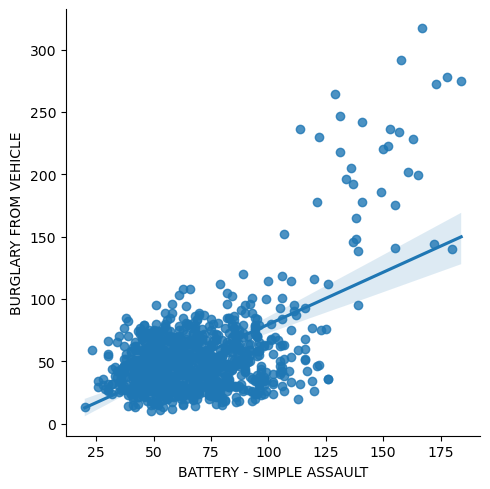

In [22]:
# Create a scatterplot for the crime types Vehicle-Stolen and Battery-Simple Assault in seaborn
sns.lmplot(x = 'BATTERY - SIMPLE ASSAULT', y = 'BURGLARY FROM VEHICLE', data = df2)

#### There is a positive correlation between the occurrences of the two crimes albeit a not very strong one. The data points in the top-right corner are situated far away from the trend line.

## 4. Create a pair plot of the aggregated data

In [23]:
# Keep only the variables you want to use in the pair plot
sub = df2[['VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY', 'BURGLARY FROM VEHICLE', 'BURGLARY']]

C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

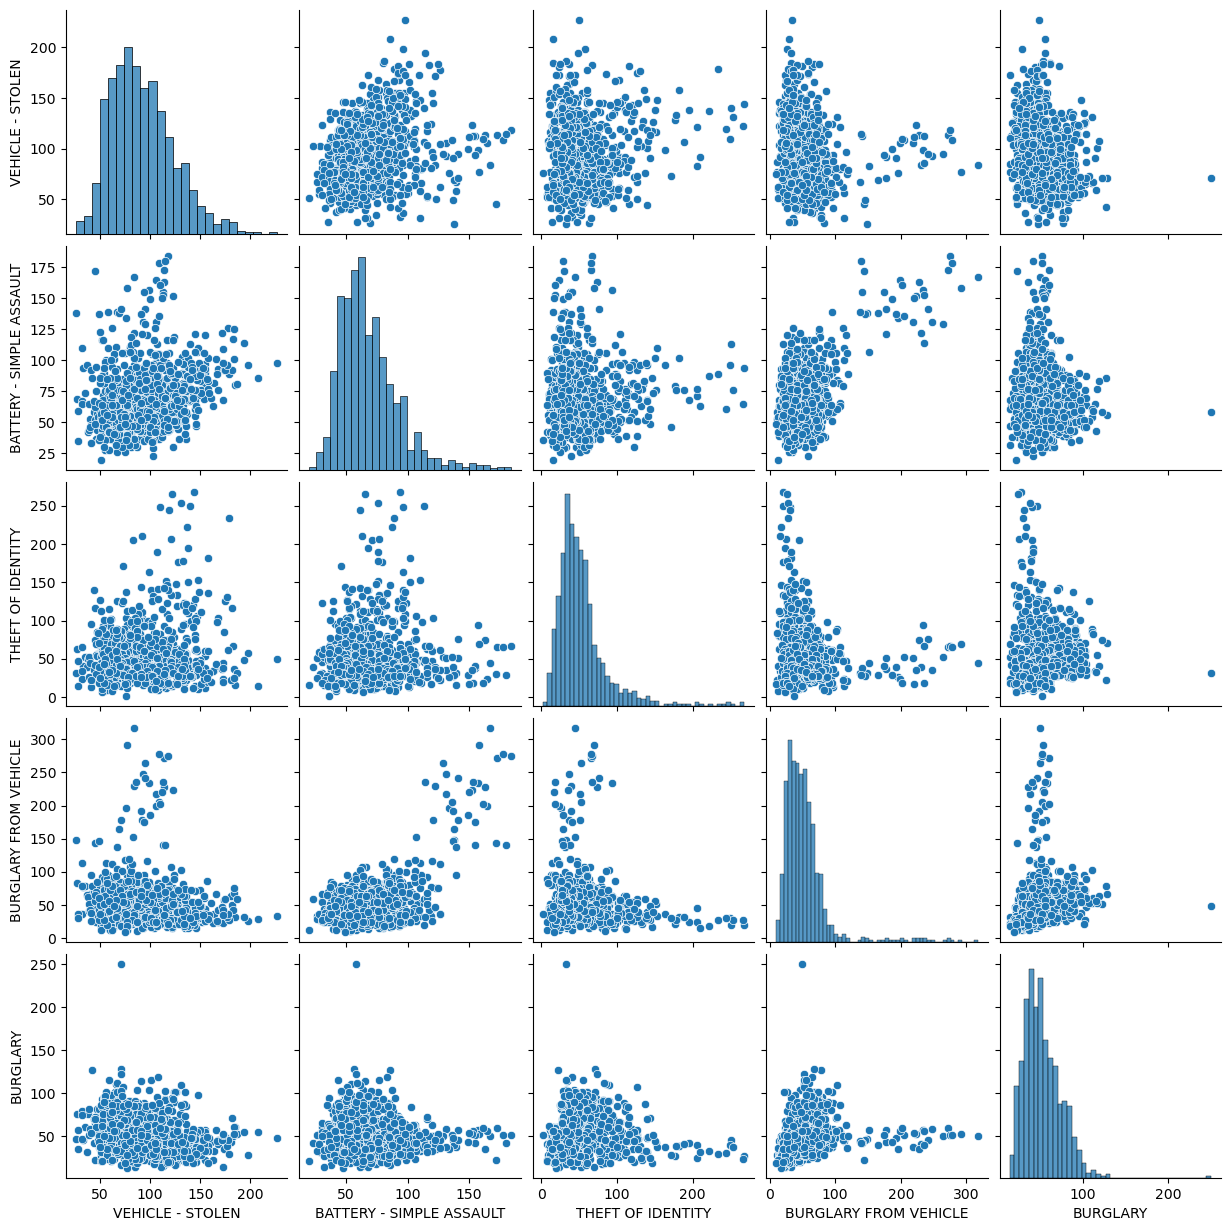

In [24]:
# Create a pair plot 
g = sns.pairplot(sub)

## 5. Create a categorical plot

#### Creating a categorical variable that categorizes the areas into three levels of crime rate

In [27]:
# Count crime rates for all areas from the original dataframe
area_counts = df['area_name'].value_counts()

In [28]:
area_counts

area_name
CENTRAL             60123
77TH STREET         55450
PACIFIC             51520
SOUTHWEST           49598
HOLLYWOOD           46558
SOUTHEAST           44696
OLYMPIC             44621
NORTH HOLLYWOOD     44263
NEWTON              44214
WILSHIRE            42269
RAMPART             41644
WEST LOS ANGELES    40495
NORTHEAST           38019
VAN NUYS            37351
WEST VALLEY         37157
HARBOR              36422
TOPANGA             36110
DEVONSHIRE          35977
MISSION             35202
HOLLENBECK          32993
FOOTHILL            29305
Name: count, dtype: int64

In [29]:
# Calculate Q1 and Q3 of the frequency list
Q1 = np.percentile(area_counts, 25)
Q3 = np.percentile(area_counts, 75)

In [30]:
Q1

36422.0

In [31]:
Q3

44696.0

In [32]:
# Define areas with high, medium, and low crime rates and put them in lists
High = area_counts[area_counts >= Q3].index.tolist()

In [33]:
Medium = area_counts[(area_counts < Q3) & (area_counts >= Q1)].index.tolist()

In [34]:
Low = area_counts[area_counts < Q1].index.tolist()

In [36]:
# Flag the area column in df2 using the categories above
df2.loc[df2.index.get_level_values('area_name').isin(High), 'area_crime_rate'] = 'High crime rate'

In [37]:
df2.loc[df2.index.get_level_values('area_name').isin(Medium), 'area_crime_rate'] = 'Medium crime rate'

In [38]:
df2.loc[df2.index.get_level_values('area_name').isin(Low), 'area_crime_rate'] = 'Low crime rate'

In [39]:
df2['area_crime_rate'].value_counts(dropna = False)

area_crime_rate
Medium crime rate    490
High crime rate      294
Low crime rate       245
Name: count, dtype: int64

C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_la

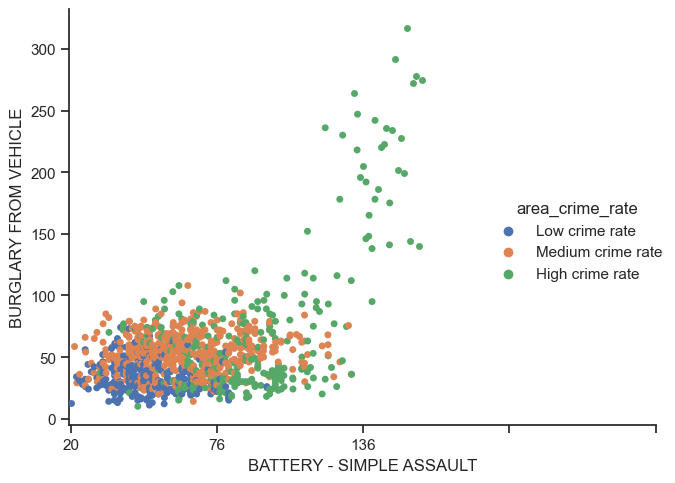

In [41]:
# Create a categorical plot in seaborn using the crime rate categories
sns.set(style="ticks")
g = sns.catplot(x="BATTERY - SIMPLE ASSAULT", y="BURGLARY FROM VEHICLE", hue="area_crime_rate", data=df2)

# Set the x-axis ticks
g.set(xticks=[0, 50, 100, 150, 200])

plt.tight_layout()

#### The correlation looks stronger for areas with a high level of crime rate, as the green data points tend to rise more when moving towards the right of the x-axis.

### Hypothesis: There is a medium positive correlation between the frequencies of simple assault and burglary from vehicle. It becomes stronger in areas characterized by high crime rate.

## Export data

In [42]:
# Reset index to convert year, month, and area_name into regular columns
df2 = df2.reset_index()

In [43]:
# Remove both index and column names
df2 = df2.rename_axis(None).rename_axis(None, axis=1)

In [44]:
df2.head()

,year_month,area_name,VEHICLE - STOLEN,BATTERY - SIMPLE ASSAULT,THEFT OF IDENTITY,BURGLARY FROM VEHICLE,BURGLARY,area_crime_rate
0,2020-01,77TH STREET,123,94,70,75,50,High crime rate
1,2020-01,CENTRAL,45,172,30,144,23,High crime rate
2,2020-01,DEVONSHIRE,40,53,51,67,54,Low crime rate
3,2020-01,FOOTHILL,69,51,45,37,35,Low crime rate
4,2020-01,HARBOR,77,49,25,29,42,Medium crime rate


In [45]:
df2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'crime_data_agg_ym.csv'))